In [1]:
import tribo as tb
import numpy as np
import os 
import re
import pandas as pd

from tribo import Tribo_file

outlier_tests = {'OA_Project_Tests_CoF':['20wt_C20A2wtOA_10N_100mms_Test11', \
                       '20wt_C20A_20N_100mms_Test2', \
                        '20wt_C20A_20N_20mms_Test8', \
                        '20wt_C20A2wtOA_20N_20mms_Test7', \
						'100-TOCN_10N_20mms_Test7', \
						'100-TOCN_20N_20mms_Test10'], \
            
            'PAO_IL_ZDDP_CoF': ['0_OA0_20N_100mms_test2', \
                                '1_IL_20N_100mms_Test5', \
                                '1_IL_20N_20mms_Test2', \
                                '1_IL_20N_20mms_Test1'], \
			'OA_Project_Oils': ['20-PAO4+OA_10N_100mms_test3', \
					    		'20-PAO4+OA_10N_20mms_test2', \
								'20-PAO4+OA_20N_20mms_test2']}

folder = 'OA_Project_Tests_CoF'

files_in_folder = os.listdir(folder)
#--------------------MARK: Extra Addition--------------------- 
# files_in_folder = []
# for root, dir, files in os.walk(folder):
# 	if not files:
# 		continue

# 	files_in_folder += files

#-----------------------------------------

print(f" Found {len(files_in_folder)} files in {folder}")


Tribo_files_list, complete_CoF_2 = tb.load_files(files_in_folder,folder,)
sg_smoothing_array=tb.smoothing_df(complete_CoF_2)
speeds_list, names_list = tb.get_speeds_and_names_in_folder(files_in_folder,Tribo_files_list)

rows=tb.remove_outliers(Tribo_files_list)
df = pd.DataFrame(rows,columns=['Name','CoF_avg','CoF_std','Speed','Percent','Force','Test'])
speed_sheets_list=tb.sort_dfs_by_speed(speeds_list,df)


tb.export_excel_results(speed_sheets_list,speeds_list,sg_smoothing_array,folder,complete_CoF_2,verbose=True)			

 Found 46 files in OA_Project_Tests_CoF
speed sheet
          Name   CoF_avg   CoF_std   Speed Percent Force       Test
0        TOCN  0.142016  0.017119  100mms     100   10N     Test11
1        TOCN  0.140715  0.014537  100mms     100   10N     Test12
2        TOCN  0.133261  0.014170  100mms     100   10N      Test4
6        TOCN  0.141316  0.009408  100mms     100   20N      test1
7        TOCN  0.126412  0.007036  100mms     100   20N     Test13
8        TOCN  0.136243  0.010152  100mms     100   20N     Test14
12  C20A2wtOA  0.234419  0.040557  100mms    20wt   10N     Test11
13  C20A2wtOA  0.129528  0.012955  100mms    20wt   10N     Test12
14  C20A2wtOA  0.123207  0.015736  100mms    20wt   10N  Test15new
15  C20A2wtOA  0.119926  0.012541  100mms    20wt   10N  Test16new
16  C20A2wtOA  0.125577  0.012493  100mms    20wt   10N      Test4
21  C20A2wtOA  0.126669  0.007815  100mms    20wt   20N     Test13
22  C20A2wtOA  0.193564  0.029036  100mms    20wt   20N     Test14
23  C20A2

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,9))
for column in sg_smoothing.columns:
    if '20N' or '10N' in column:
        plt.plot(sg_smoothing[column],label=column)
        plt.legend()
plt.show()



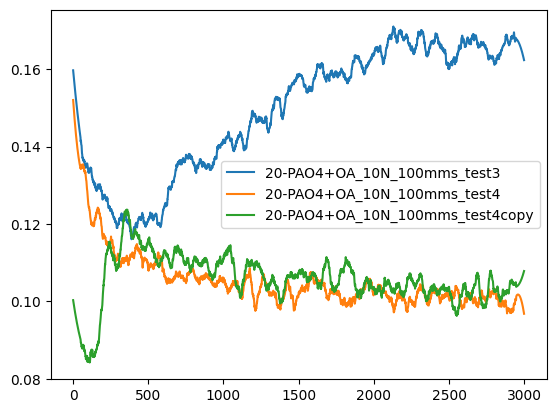

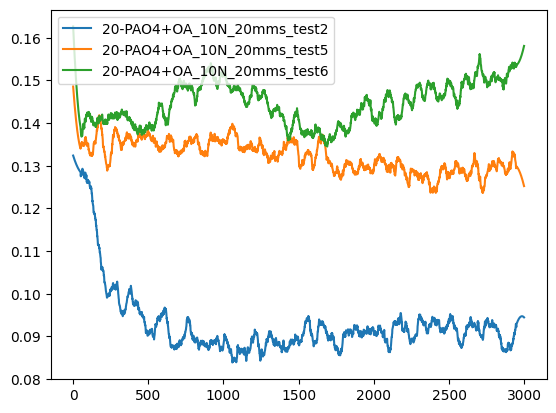

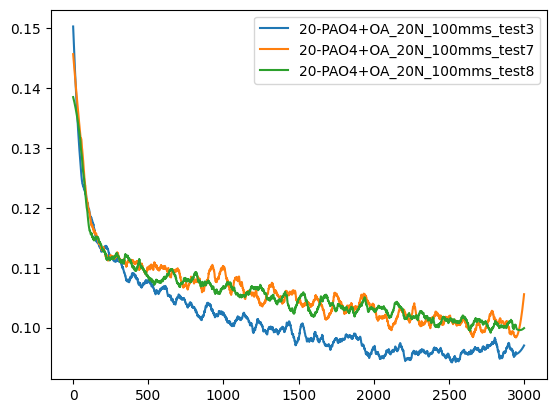

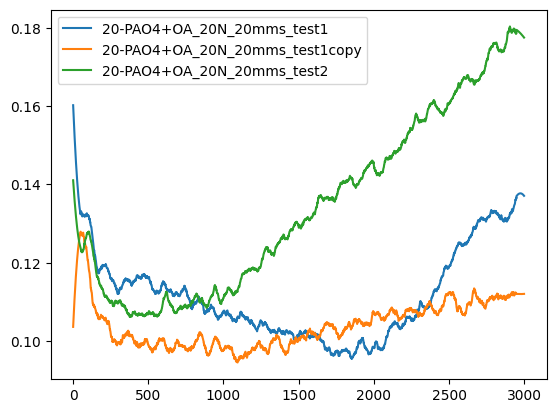

In [18]:

avg_CoF_tests = {'OA_Project_Tests_CoF':['100-TOCN_20N_20mms_Test8', \
                                         '20wt_C20A_10N_20mms_Test6', \
                                         '20wt_C20A_10N_100mms_Test14', \
                                         '20wt_C20A_20N_20mms_Test16new', \
                                         '20wt_C20A_20N_100mms_Test12', \
                                        '20wt_C20A2wtOA_10N_20mms_Test8', \
                                        '20wt_C20A2wtOA_10N_100mms_Test4', \
                                        '20wt_C20A2wtOA_20N_20mms_Test6', \
                                        '20wt_C20A2wtOA_20N_100mms_Test17new', \
                                        '100-TOCN_10N_100mms_Test12', \
                                        '100-TOCN_10N_20mms_Test6', \
                                        '100-TOCN_20N_100mms_Test14'], \
                                        
                 'PAO_IL_ZDDP_CoF': ['0_OA0_20N_100mms_test13', \
                                     '0_OA0_20N_20mms_test1', \
                                     '1-ZADP_20N_100mms_Test5', \
                                     '1-ZADP_20N_20mms_Test3', \
                                     '1_IL_20N_100mms_Test5', \
                                     '1_IL_20N_20mms_Test4']}                      

pattern = r'(_test|_Test).*'
pattern2 = r'_[^_]*$'
unique_names = {}

for column in sg_smoothing.columns:
    if '10mms' in column:
         continue
    if '20N' or '10N' in column:
    # if '20N' in column:

        # Apply the regex pattern to get the unique name
        unique_name = re.sub(pattern2, '', column)
        # Check if the unique name is already a key in the dictionary
        if unique_name in unique_names:
            # Append the original column name to the list associated with the unique name
            unique_names[unique_name].append(column)
        else:
                # Create a new entry with the unique name as the key and a list containing the original column name
                unique_names[unique_name] = [column]

os.makedirs(f'{folder}_Images', exist_ok=True)

for (key, value) in unique_names.items():
    for spec_val in value:
        plt.plot(sg_smoothing[spec_val],label=spec_val)
    # plt.title(key)
    plt.legend()
    plt.savefig(os.path.join(f'{folder}_Images', f'{key}.png'))
    plt.show()    
    # print(key, unique_names[key])

# for column in sg_smoothing.columns:
#     if '20N' in column:
#         if re.sub(pattern, '', column) in unique_names:
            
#             plt.plot(sg_smoothing[column],label=column)
#             plt.legend()

In [ ]:
# with pd.ExcelWriter(f'{folder}.xlsx') as writer:
    # print(sg_smoothing.head())
print(avg_CoF_tests[folder], f'\n Length: {len(avg_CoF_tests[folder])}')
count =0
good_test_in_folder_list = []
for ii in range(len(sg_smoothing.columns)):
    for jj in range(len(avg_CoF_tests[folder])):
        # print(  avg_CoF_tests[folder][jj]==sg_smoothing.columns[ii])
        if  avg_CoF_tests[folder][jj]==sg_smoothing.columns[ii]:
            count+=1
            print(avg_CoF_tests[folder][jj])
            good_test_in_folder_list.append(avg_CoF_tests[folder][jj])
print(count)

good_test_df = sg_smoothing.loc[:, good_test_in_folder_list]

# for good_test in avg_CoF_tests[folder]:
#     good_test_df = pd.concat([good_test_df, sg_smoothing[good_test]], ignore_index=True)
print(good_test_df)

with pd.ExcelWriter(f'{folder}.xlsx', engine='openpyxl', mode='a') as writer: 
    good_test_df.to_excel(writer, sheet_name='Good_Tests', index=False)
    # good_test_df.to_excel(writer, sheet_name='Good Tests', index=False)


In [ ]:
print('This block of code will reorganize the "total" sheet into a friction table based on the user input which will \n include percent reduction for ease of integration into origin.')
total_dataframe = pd.read_excel(f'{folder}.xlsx', sheet_name='Total')


def input_table_title(): # recursive function to get the table title from the user
    table_title = input('Would you like to create a friction table based on force or speed? (only type f for force or s for speed): ')
    if table_title != 'f' and table_title != 's':
        print('Invalid input. Please enter f or s')
        return input_table_title() # recursive call to get the user input
    else:
        return table_title
    
def input_include_percent(): # recursive function to get the user input for including the percentages in the friction table
    include_percent = input('Would you like to include the percentages in the names in the friction table? (y/n): ')
    if include_percent != 'y' and include_percent != 'n':
        print('Invalid input. Please enter y or n')
        return input_include_percent()
    else:
        return include_percent

def input_ref_sample():
    ref_sample = input('Please enter the reference sample for the friction table: (sample that you are measuring the percent reduction with respect to)' \
                       'If you put included the percentage in the names please include the percentage in the reference name as well: ')
    if ref_sample not in total_dataframe['Name'].values:
        print('Invalid input. Please enter a valid sample name')
        return input_ref_sample()
    return ref_sample

table_title = input_table_title()
include_percent = input_include_percent()

if include_percent == 'y':
    total_dataframe['Name'] = total_dataframe['Percent'].astype(str) + '%' + ' ' + total_dataframe['Name']

reference_sample = input_ref_sample()

possible_params = {'f': 'Force', 's': 'Speed'} # dictionary storing the possible parameters in total sheet and their units
dataframe_dict = {} # dictionary to store the dataframes for each unique table title
other_unique_params = {} # dictionary to store the unique parameter values for the other parameter(s) in the possible params dictionary


unique_param_titles = total_dataframe[possible_params[table_title]].unique() # unique parameter table title values stored as a list

for (key, value) in possible_params.items(): # loop through the possible params dictionary
    if key == table_title: # ignore the table title sample
        continue
    else:
        other_unique_params[value] = total_dataframe[value].unique() # store the unique parameter values for the other parameter(s) in the other unique params dictionary

for param in unique_param_titles:
    param_df = total_dataframe[total_dataframe[possible_params[table_title]] == param]
    param_df = param_df.drop(columns=[possible_params[table_title]])
    final_df = pd.DataFrame()
    percent_reduction_df = pd.DataFrame()
    for other_param in other_unique_params: # entering the other unique params dictionary using the key value
        for param2 in other_unique_params[other_param]: # for loop getting all unique params for all non table title parameters
            temp_df = param_df[param_df[other_param] == param2]
            temp_df = temp_df.drop(columns=[other_param])
            
            if include_percent == 'n':
                temp_df = temp_df.drop(columns=['Percent'])

            reference_value = temp_df[temp_df['Name'] == reference_sample]['CoF_avg'].values[0]
            percent_reduction_df = temp_df['CoF_avg'].apply(lambda x: 'REF' if x == reference_value else ((reference_value - x) / reference_value) * 100)

            temp_df = temp_df.rename(columns={'CoF_avg': f'{param2}', 'CoF_std': f'{param2} STDEV'})
            temp_df.insert(2, f'% Percent Reduction {param2}', percent_reduction_df)

            # Separate the reference sample row
            reference_row = temp_df[temp_df['Name'] == reference_sample]
            # Drop the reference sample row from temp_df to avoid duplication
            temp_df = temp_df[temp_df['Name'] != reference_sample]
            # Concatenate the reference sample row at the top
            temp_df = pd.concat([reference_row, temp_df], ignore_index=True)

            if final_df.empty:
                final_df = temp_df
            else:
                final_df = pd.merge(final_df, temp_df, how='left', on='Name')
    dataframe_dict[f'{param} Organized Table'] = final_df

for (key, value) in dataframe_dict.items():
    print(f'{key}\n{value.to_string()}\n\n')

with pd.ExcelWriter(f'{folder}.xlsx', engine='openpyxl', mode='a') as writer:
    for (key, value) in dataframe_dict.items():
        value.to_excel(writer, sheet_name=f'{key}', index=False)

# df['% Reduction 10N'] = df['10N'].apply(lambda x: 'REF' if x == reference_value else ((reference_value - x) / reference_value) * 100)
